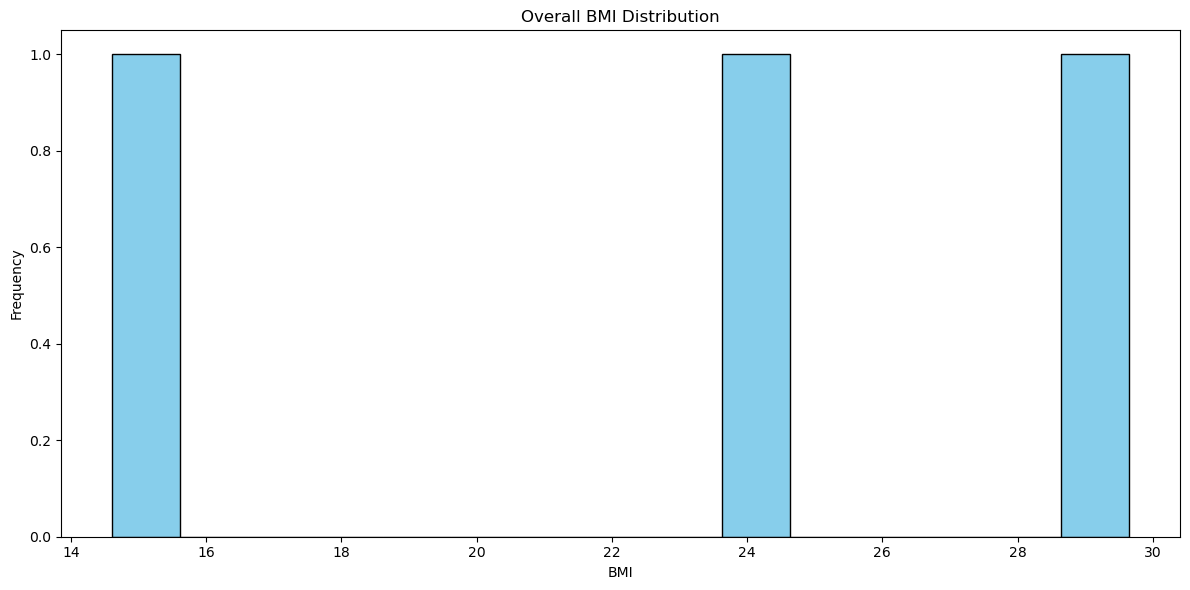

C:\Users\Harshith GR\AppData\Local\Temp\ipykernel_22132\601264499.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_distribution = df.groupby(['name', 'category']).size().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

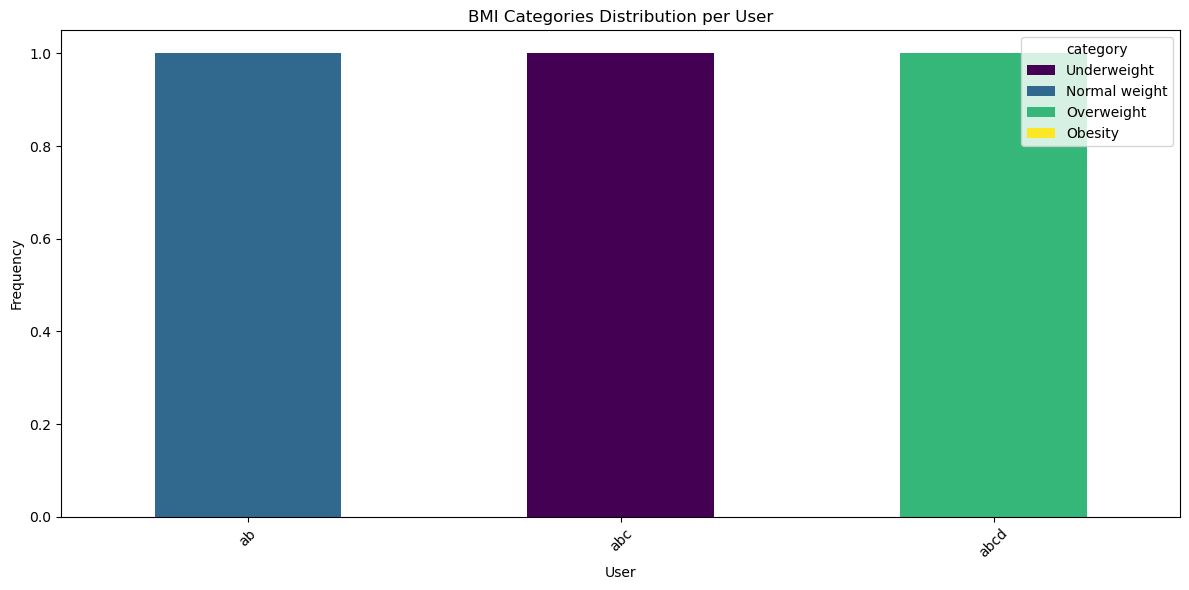

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
conn = sqlite3.connect('bmi_data.db')
cursor = conn.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS bmi_records
                  (user_id INTEGER PRIMARY KEY AUTOINCREMENT,
                   name TEXT,
                   weight REAL,
                   height REAL,
                   bmi REAL,
                   date TEXT)''')
conn.commit()
def calculate_bmi():
    try:
        weight = float(weight_entry.get())
        height = float(height_entry.get()) / 100  
        bmi = weight / (height ** 2)
        bmi = round(bmi, 2)
        result_label.config(text=f"Your BMI: {bmi}")
        if bmi < 18.5:
            category = "Underweight"
        elif 18.5 <= bmi < 24.9:
            category = "Normal weight"
        elif 25 <= bmi < 29.9:
            category = "Overweight"
        else:
            category = "Obesity"
        category_label.config(text=f"Category: {category}")
        cursor.execute("INSERT INTO bmi_records (name, weight, height, bmi, date) VALUES (?, ?, ?, ?, date('now'))",
                       (name_entry.get(), weight, height, bmi))
        conn.commit()
        messagebox.showinfo("Success", "BMI record saved successfully!")
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numbers for weight and height.")
def view_history():
    cursor.execute("SELECT * FROM bmi_records")
    records = cursor.fetchall()
    if records:
        history_window = tk.Toplevel(root)
        history_window.title("BMI History")
        frame = ttk.Frame(history_window, padding="10", style='TFrame')
        frame.pack(fill=tk.BOTH, expand=True)
        for record in records:
            tk.Label(frame, text=f"Name: {record[1]}, Date: {record[5]}, Weight: {record[2]} kg, Height: {record[3]} m, BMI: {record[4]}",
                     background='#2E2E2E', foreground='white').pack()
    else:
        messagebox.showinfo("No Records", "No BMI records available.")
def generate_statistics():
    cursor.execute("SELECT * FROM bmi_records")
    data = cursor.fetchall()
    if not data:
        messagebox.showinfo("No Data", "No BMI records available for analysis.")
        return
    df = pd.DataFrame(data, columns=['user_id', 'name', 'weight', 'height', 'bmi', 'date'])
    # Plot BMI distribution
    plt.figure(figsize=(12, 6))
    plt.hist(df['bmi'], bins=15, edgecolor='black', color='skyblue')
    plt.title("Overall BMI Distribution")
    plt.xlabel("BMI")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    # Plot BMI range distribution per user
    plt.figure(figsize=(12, 6))
    bins = [0, 18.5, 24.9, 29.9, 40]  
    labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']
    df['category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)
    category_distribution = df.groupby(['name', 'category']).size().unstack().fillna(0)
    category_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.title("BMI Categories Distribution per User")
    plt.xlabel("User")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
def clear_history():
    cursor.execute("DELETE FROM bmi_records WHERE name=?", (name_entry.get(),))
    conn.commit()
    messagebox.showinfo("History Cleared", "All BMI records for this user have been cleared.")
    view_history()  
root = tk.Tk()
root.title("BMI Calculator")
style = ttk.Style()
style.configure('TLabel', font=('Helvetica', 12), background='#2E2E2E', foreground='white')
style.configure('TButton', font=('Helvetica', 12), padding=6, background='#4CAF50', foreground='black')
style.configure('TEntry', font=('Helvetica', 12), padding=5, fieldbackground='#3A3A3A', foreground='black')
style.configure('TFrame', background='#2E2E2E')
main_frame = ttk.Frame(root, padding="20", style='TFrame')
main_frame.grid(row=0, column=0, padx=10, pady=10, sticky=tk.W+tk.E+tk.N+tk.S)
ttk.Label(main_frame, text="Name:").grid(row=0, column=0, padx=10, pady=5, sticky=tk.W)
name_entry = ttk.Entry(main_frame)
name_entry.grid(row=0, column=1, padx=10, pady=5)
# Weight input
ttk.Label(main_frame, text="Weight (kg):").grid(row=1, column=0, padx=10, pady=5, sticky=tk.W)
weight_entry = ttk.Entry(main_frame)
weight_entry.grid(row=1, column=1, padx=10, pady=5)
# Height input
ttk.Label(main_frame, text="Height (cm):").grid(row=2, column=0, padx=10, pady=5, sticky=tk.W)
height_entry = ttk.Entry(main_frame)
height_entry.grid(row=2, column=1, padx=10, pady=5)
# Calculate button
calculate_button = ttk.Button(main_frame, text="Calculate BMI", command=calculate_bmi)
calculate_button.grid(row=3, column=0, columnspan=2, pady=10)
# BMI Result display
result_label = ttk.Label(main_frame, text="Your BMI: ")
result_label.grid(row=4, column=0, columnspan=2)
# Category display
category_label = ttk.Label(main_frame, text="Category: ")
category_label.grid(row=5, column=0, columnspan=2)
# View History button
history_button = ttk.Button(main_frame, text="View History", command=view_history)
history_button.grid(row=6, column=0, columnspan=2, pady=10)
# Generate Statistics button
stats_button = ttk.Button(main_frame, text="Generate Statistics", command=generate_statistics)
stats_button.grid(row=7, column=0, columnspan=2, pady=10)
# Clear History button
clear_history_button = ttk.Button(main_frame, text="Clear History", command=clear_history)
clear_history_button.grid(row=8, column=0, columnspan=2, pady=10)
root.mainloop()
conn.close()
